In [1]:
import os
import os.path
import pickle
import bz2
from glob import glob
import random
import shutil
from datetime import datetime
from tqdm.auto import tqdm
import importlib


import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorboard.plugins.hparams import api as hp
from sklearn.model_selection import train_test_split
from kerashypetune import KerasGridSearch

import dsci592.model as dsci

In [2]:
importlib.reload(dsci)

<module 'dsci592.model' from '/home/noah/projects/drexel/dsci592/DS-capstone-pt1/code/src/dsci592/model.py'>

In [3]:
golden_dataset_file_name = os.path.join('/', 'data', 'projects', 'drexel', 'dsci592', 'feeFiFoFum.pkl')
with tf.device('/gpu:1'):  # using other GPU for another task
    df = dsci.load_dataset(golden_dataset_file_name)

2022-02-23 19:19:40.761747: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 19:19:40.762322: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 19:19:40.804963: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 19:19:40.805203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 19:19:40.805404: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [5]:
df.days

AttributeError: 'DataFrame' object has no attribute 'days'

In [25]:
# Validate number of counties in the dataframe
print(len(df.fips.unique()))
print(len(df.latitude.unique()))
print(len(df.longitude.unique()))
df['lat_long'] = df.latitude.astype(str) + df.longitude.astype(str)
print(len(df.lat_long.unique()))

3083
3082
3083
3083


In [23]:
df.iloc[100:101]

,fips,JHU_ConfirmedCases.data,JHU_ConfirmedDeaths.data,cyclical_sin,cyclical_cos,continuous_sin,continuous_cos,geo0,geo1,geo2,...,healthInsNativeWith,healthInsForeignNatWith,healthInsForeignNoncitWith,healthInsForeignNatNo,healthInsForeignNoncitNo,healthInsNativeNo,pm25,latitude,longitude,lat_long
100,45001,103.0,0.0,0.958718,-0.284359,0.184844,0.982768,0.597063,0.17526,0.124699,...,-0.262976,-0.137842,-0.148042,-0.143646,-0.141956,-0.196056,0.811931,-0.830256,0.80029,-0.83025579554373450.8002900340581997


In [26]:
df[['fips']].iloc[100]

fips    45001
Name: 100, dtype: int64

623


<AxesSubplot:xlabel='days'>

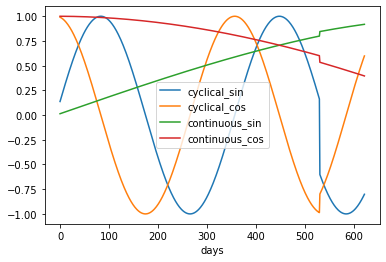

In [37]:
one_county = df[df.fips == 45001].copy()
one_county['days'] = np.arange(len(one_county))
print(len(one_county))
# cyclical_sin = one_county.cyclical_sin
one_county.plot(y=['cyclical_sin', 'cyclical_cos', 'continuous_sin', 'continuous_cos'], x='days')